## TSFs Task 5 by Naman Jain

### Exploratory Data Analysis - Sports (Indian Premier League)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
delivery = pd.read_csv('deliveries.csv')
match = pd.read_csv('matches.csv')
print('Data Imported and Read Successfully')

Data Imported and Read Successfully


In [4]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Data Insights

In [6]:
match.info()
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### Now we will merge two datasets for better understanding and information

In [9]:
merge = pd.merge(delivery,match,left_on='match_id', right_on='id')
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [10]:
merge.columns.values

array(['match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder', 'id', 'season',
       'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3'],
      dtype=object)

In [11]:
match.set_index('id', inplace=True)

In [12]:
match.describe(include = 'all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,2012-04-19,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,Nitin Menon
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [13]:
match.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### **As we can see here:**

#### 1. City has 7 missing values
#### 2. And around 90% value is missing im umpire3 column
#### 3. There are some missing data in umpire1 and umpire2 column
#### 4. Some missing values are there in the winner column

In [14]:
match = match.drop('umpire3', axis=1)

### **Now we fill the City Column**

#### First we check which rows are empty

In [15]:
match[match.city.isnull()][['city', 'venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


#### *So the missing values can be replaced by the venue place i.e. in this case it can be replaced with Dubai.*

In [16]:
match.city = match.city.fillna('Dubai')

## **Data Analysis**

#### **Number of Matches played in a single season**

Text(0.5, 0, 'Year')

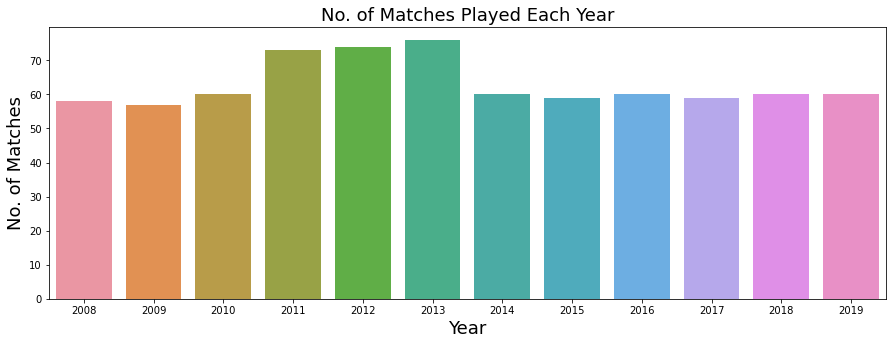

In [17]:
plt.figure(figsize=(15,5))
sns.countplot('season', data=match)
plt.title('No. of Matches Played Each Year', fontsize=18)
plt.ylabel('No. of Matches', fontsize=18)
plt.xlabel('Year', fontsize=18)

#### *In year 2013, most matches were played.*

#### **How many teams played each season**

Text(0, 0.5, 'No of Teams')

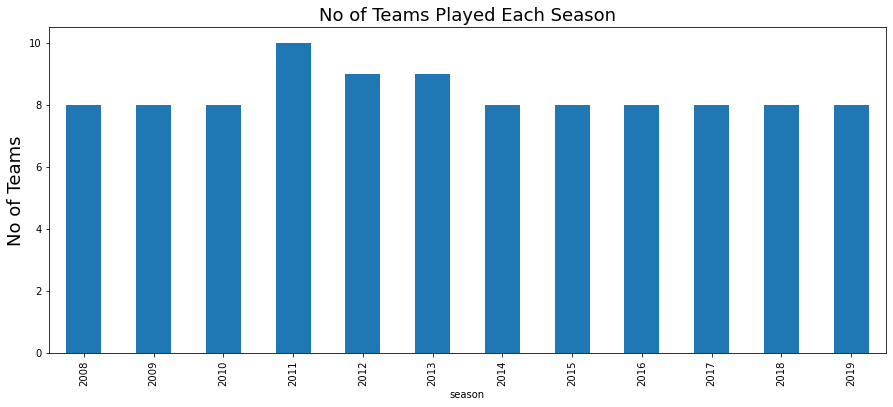

In [18]:
match.groupby('season')['team1'].nunique().plot(kind='bar', figsize=(15,6))
plt.title('No of Teams Played Each Season', fontsize=18)
plt.ylabel('No of Teams', fontsize=18)

#### *10 Teams Played in the 2011's Season*  

#### **Team which has won maximum matches**

Text(0.5, 0, 'No of Matches Won')

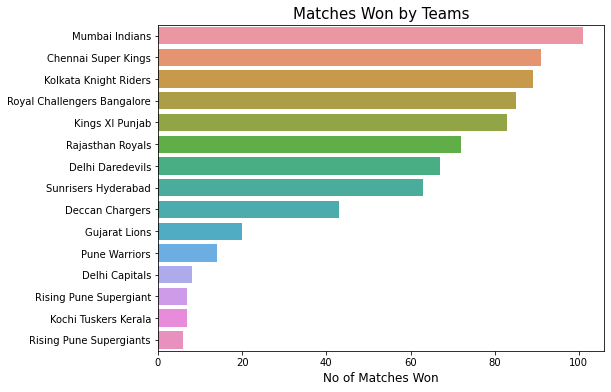

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(match['team1'].value_counts().values, match['winner'].value_counts().index)
plt.title('Matches Won by Teams', fontsize=15)
plt.xlabel('No of Matches Won', fontsize=12)

#### *Mumbai Indians followed by the Chennai Super Kings has won the most no of matches.*

#### **Toss Decision**

Text(0.5, 1.0, 'Toss Decision')

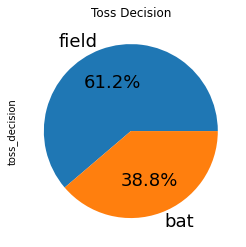

In [20]:
df= match['toss_decision'].value_counts()
df.plot(kind='pie', fontsize=18, autopct='%3.1f%%')
plt.title('Toss Decision')

#### *Around 60% of the teams chose to field after winning the toss.*

#### **Winners according to the Toss Decisions**

<AxesSubplot:xlabel='toss_decision_result', ylabel='count'>

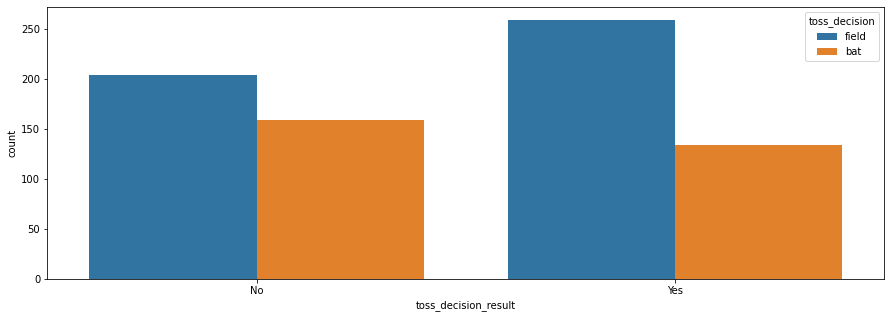

In [21]:
winner = {}
match['toss_decision_result'] = np.where((match.toss_winner == match.winner), 'Yes', 'No')
plt.figure(figsize=(15,5))
sns.countplot('toss_decision_result', data=match, hue='toss_decision')

#### *Toss winning teams who chose to field first has won the most no of matches.* 

#### **Team Decisions after Winning the Toss**

<AxesSubplot:xlabel='winner', ylabel='count'>

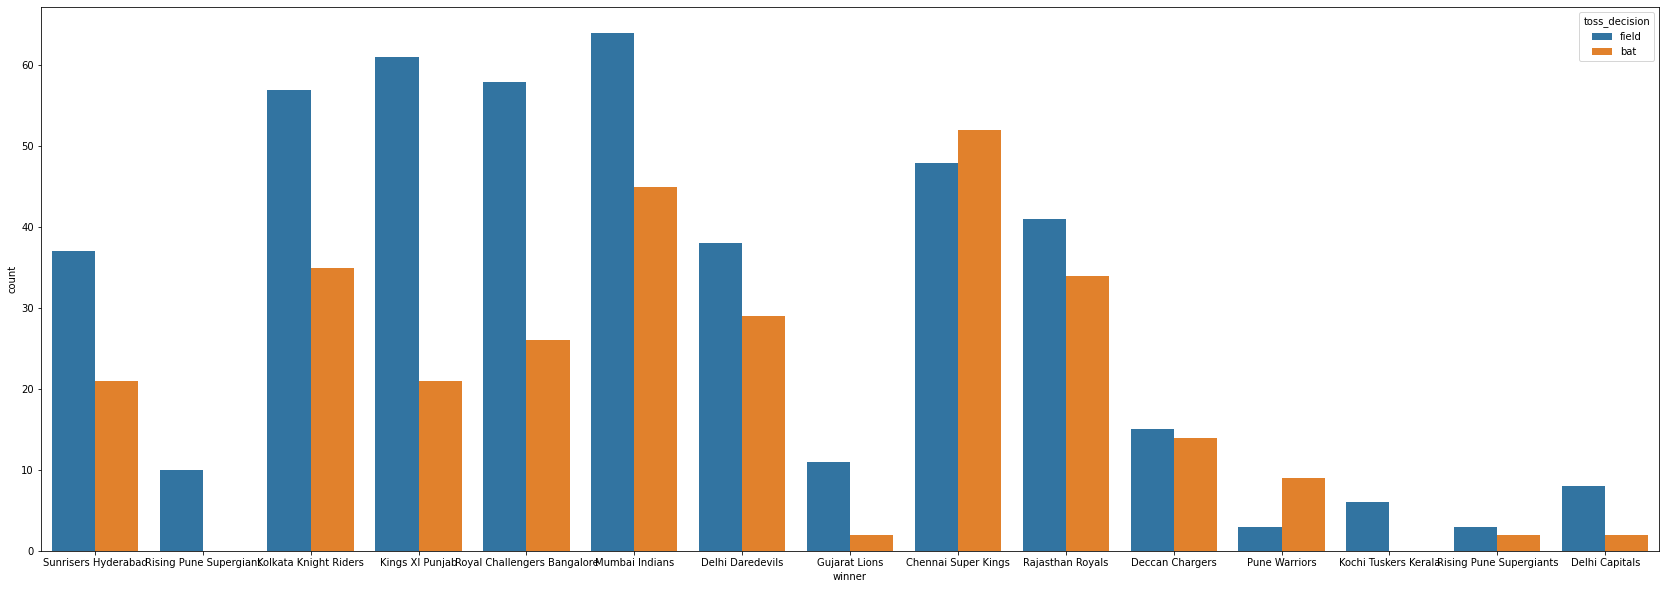

In [22]:
plt.figure(figsize=(29,10))
sns.countplot('winner', data=match, hue='toss_decision')

#### *Most of the teams decided to field first after winning the toss*

#### **Winners of IPL accross all seasons**

In [23]:
final_matches = match.drop_duplicates(subset=['season'],keep='last')
final_matches[['season','winner']]

,season,winner
id,,
59,2017,Mumbai Indians
117,2008,Rajasthan Royals
174,2009,Deccan Chargers
234,2010,Chennai Super Kings
307,2011,Chennai Super Kings
381,2012,Kolkata Knight Riders
457,2013,Mumbai Indians
517,2014,Kolkata Knight Riders
576,2015,Mumbai Indians


Text(0, 0.5, 'Count')

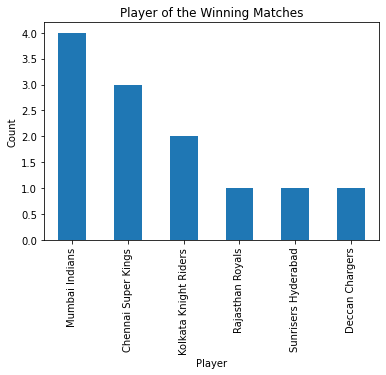

In [24]:
final_matches["winner"].value_counts().plot(kind="bar")
plt.title('Player of the Winning Matches')
plt.xlabel("Player")
plt.ylabel("Count")

#### *Mumbai Indian Followed by Chennai Super Kings have won the IPL most Times*

#### **Top Wicket Takers**

Text(0.5, 1.0, 'Top Bowlers')

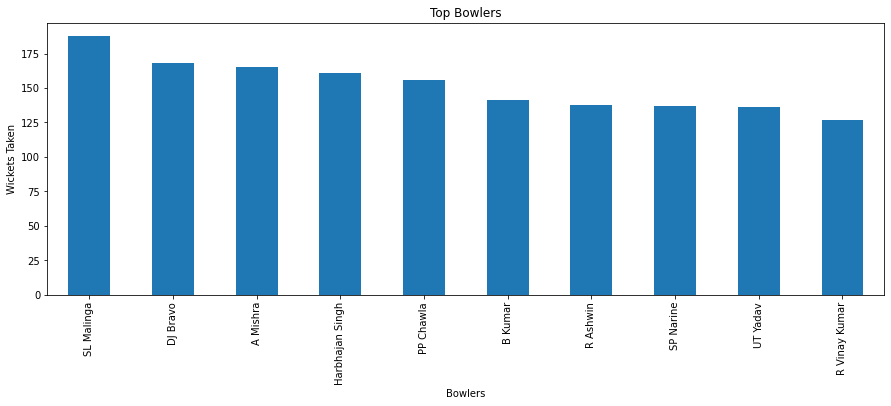

In [25]:
plt.figure(figsize=(15,5))
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False)[:10].plot(kind='bar')
plt.xlabel('Bowlers')
plt.ylabel('Wickets Taken')
plt.title('Top Bowlers')

#### *Lasith Malinga followed by Dwayne Bravo are the highest wicket takers of all time in the history of IPL.*

#### **Highest Run Scorers**

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

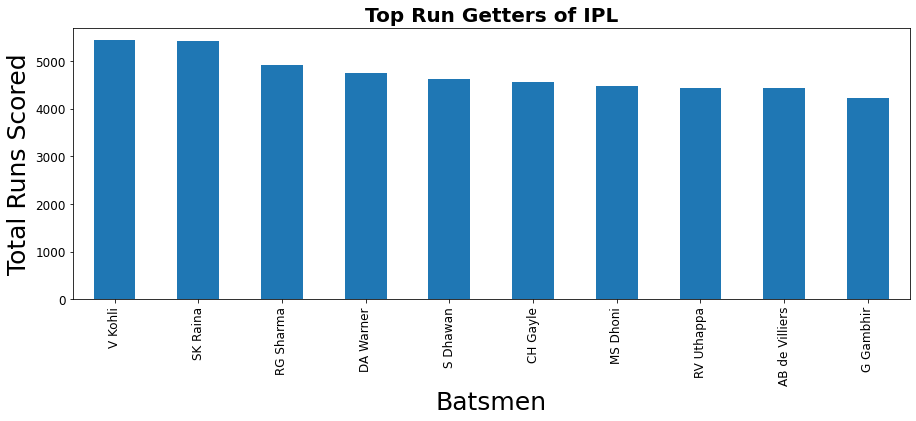

In [27]:
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

#### *Virat Kohli followed by SK Raina are the most Run getters of IPL*

#### **Most Consistent Batsmen**

<AxesSubplot:>

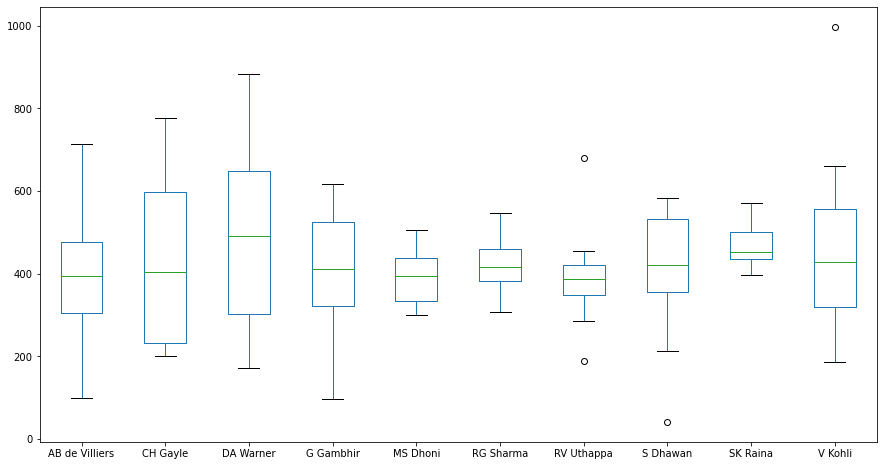

In [28]:
batsman = merge[merge.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]

batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))

#### *Most consistent player is SK Raina*

## **Conclusion**

#### 1.Mumbai Indian is most successfull team which has won most matches and IPL season.
#### 2.CH Gayle is the player who is most top player of winning matches.
#### 3.SL Malinga is Player with most wickets.
#### 4.Team which choose to field after winning toss has high probability of winning match.
#### 5.Most of Team after winning toss decide fielding.
#### 6.Most consistent player is SK Raina.
#### 7.Company should go for Mumbai Indian followed by Chennai Super Kings as they both are most successfull team to endorse any product.
#### 8.Company should go for Player like CH Gayle, SL Malinga, SK Raina to endorse any products.